In [204]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [205]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [206]:
!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset

  0% 0.00/734k [00:00<?, ?B/s]
100% 734k/734k [00:00<00:00, 119MB/s]


In [207]:
!unzip /content/diabetes-prediction-dataset.zip

Archive:  /content/diabetes-prediction-dataset.zip
  inflating: diabetes_prediction_dataset.csv  


In [208]:
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


<Axes: xlabel='diabetes', ylabel='count'>

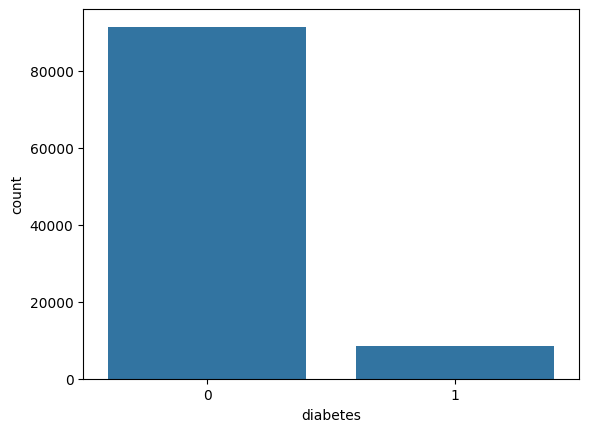

In [209]:
sns.countplot(x='diabetes',data=df)

In [210]:
df.duplicated().sum()

3854

In [211]:
df = df.drop_duplicates()
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score

In [213]:
column_names = df.columns.tolist()
print("Column Names:")
print(column_names)

Column Names:
['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


In [214]:
df_encoded = df.copy()

# Create a label encoder object
label_encoder = LabelEncoder()

# Iterate through each object column and encode its values
for column in df_encoded.select_dtypes(include='object'):
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# Now, df_encoded contains the label-encoded categorical columns

df_encoded

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,0,24.60,4.8,145,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


In [215]:
df_encoded ['diabetes'].value_counts()

diabetes
0    87664
1     8482
Name: count, dtype: int64

   gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       0  80.0             0              1                4  25.19   
1       0  54.0             0              0                0  27.32   
2       1  28.0             0              0                4  27.32   
3       0  36.0             0              0                1  23.45   
4       1  76.0             1              1                1  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0   0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64
(175328,) (175328,)


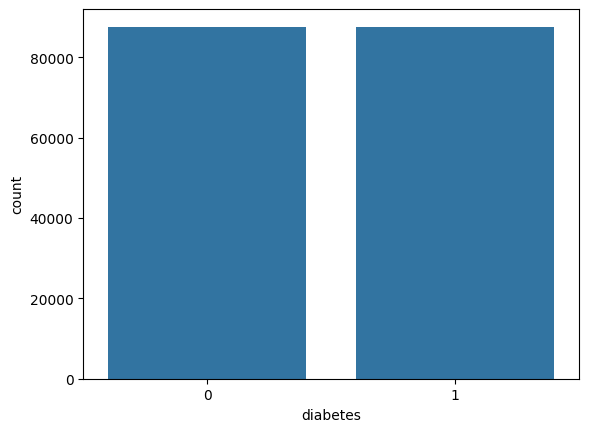

In [220]:
from sklearn.utils import resample
Y=df_encoded['diabetes']
df_majority = df_encoded[Y == 0]

df_minority = df_encoded[Y == 1]
size_major = len(df_majority)

y_majority = Y[Y == 0]
y_minority = Y[Y == 1]

# Upsample minority class, Preserving info, Avoid info loss, Performance improvement.
df_minority_upsampled = resample(df_minority,
                   replace=True,    # sample with replacement
                   n_samples=size_major,    # to match majority class
                   random_state=42)  # reproducible results

X = pd.concat([df_majority, df_minority_upsampled])
y_minority_upsampled = y_minority[df_minority_upsampled.index]
Y = pd.concat([y_majority, y_minority_upsampled])

sns.countplot(x = Y);
print(X.head(),Y.head())
print(Y.shape,Y.shape)

In [222]:

from sklearn.model_selection import train_test_split
X_train , X_test , Y_train ,Y_test = train_test_split(X,Y , test_size= 0.20 , random_state= 42)

In [219]:
df_encoded

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,0,24.60,4.8,145,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


In [225]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)


y_pred_rfc = rfc.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred_rfc)
conf_matrix = confusion_matrix(Y_test, y_pred_rfc)
classification_rep = classification_report(Y_test, y_pred_rfc)


print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 1.0
Confusion Matrix:
[[17532     0]
 [    0 17534]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17532
           1       1.00      1.00      1.00     17534

    accuracy                           1.00     35066
   macro avg       1.00      1.00      1.00     35066
weighted avg       1.00      1.00      1.00     35066



In [226]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

y_pred_dtc = dtc.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred_dtc)
conf_matrix = confusion_matrix(Y_test, y_pred_dtc)
classification_rep = classification_report(Y_test, y_pred_dtc)


print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 1.0
Confusion Matrix:
[[17532     0]
 [    0 17534]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17532
           1       1.00      1.00      1.00     17534

    accuracy                           1.00     35066
   macro avg       1.00      1.00      1.00     35066
weighted avg       1.00      1.00      1.00     35066



In [227]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

y_pred_knn = knn.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred_knn)
conf_matrix = confusion_matrix(Y_test, y_pred_knn)
classification_rep = classification_report(Y_test, y_pred_knn)


print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9815775965322535
Confusion Matrix:
[[16895   637]
 [    9 17525]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     17532
           1       0.96      1.00      0.98     17534

    accuracy                           0.98     35066
   macro avg       0.98      0.98      0.98     35066
weighted avg       0.98      0.98      0.98     35066



In [228]:
from sklearn.ensemble import AdaBoostClassifier
adab = AdaBoostClassifier()
adab.fit(X_train, Y_train)

y_pred_adab = adab.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred_adab)
conf_matrix = confusion_matrix(Y_test, y_pred_adab)
classification_rep = classification_report(Y_test, y_pred_adab)


print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 1.0
Confusion Matrix:
[[17532     0]
 [    0 17534]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17532
           1       1.00      1.00      1.00     17534

    accuracy                           1.00     35066
   macro avg       1.00      1.00      1.00     35066
weighted avg       1.00      1.00      1.00     35066

